<a href="https://colab.research.google.com/github/SMMiroE/Herramientas-de-calculo-y-simulacion-de-procesos-dinamicos/blob/main/SMME_Modulo_1__Semana_6_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Curso Herramientas para la simulacion de Sistemas Dinamicos**

**Actividades Semana 6**

**Lenguaje Julia**  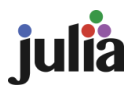
https://julialang.org/

In [ ]:
versioninfo() #setear a Runtime en Julia  https://julialang.org/learning/

Julia Version 1.10.9
Commit 5595d20a287 (2025-03-10 12:51 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, broadwell)
Threads: 2 default, 0 interactive, 1 GC (on 2 virtual cores)
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = auto


In [ ]:

using Plots

In [ ]:

using Pkg;


In [ ]:

Pkg.add("LaTeXStrings")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [ ]:
# @title
# Instala el kernel de Julia y librerías (ejecutar una vez por sesión)
using Pkg
Pkg.add("IJulia")
Pkg.add("Plots")
Pkg.add("GR") # GR es un backend rápido para Plots
Pkg.add("SpecialFunctions")
import Pkg
Pkg.add("PlotlyJS")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


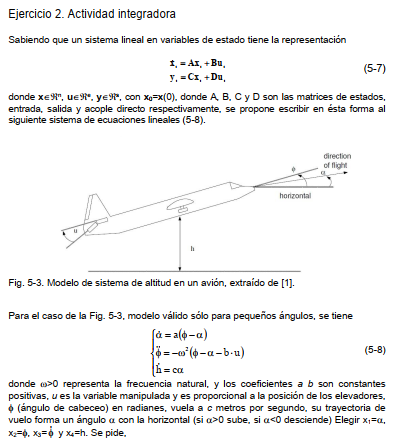
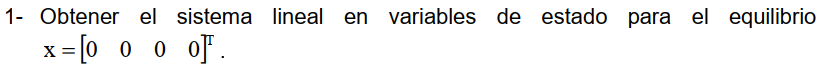

Autovalores de la matriz A:
ComplexF64[-0.005000000000000001 - 0.1999374902313221im, -0.005000000000000001 + 0.1999374902313221im, 0.0 + 0.0im, 0.0 + 0.0im]


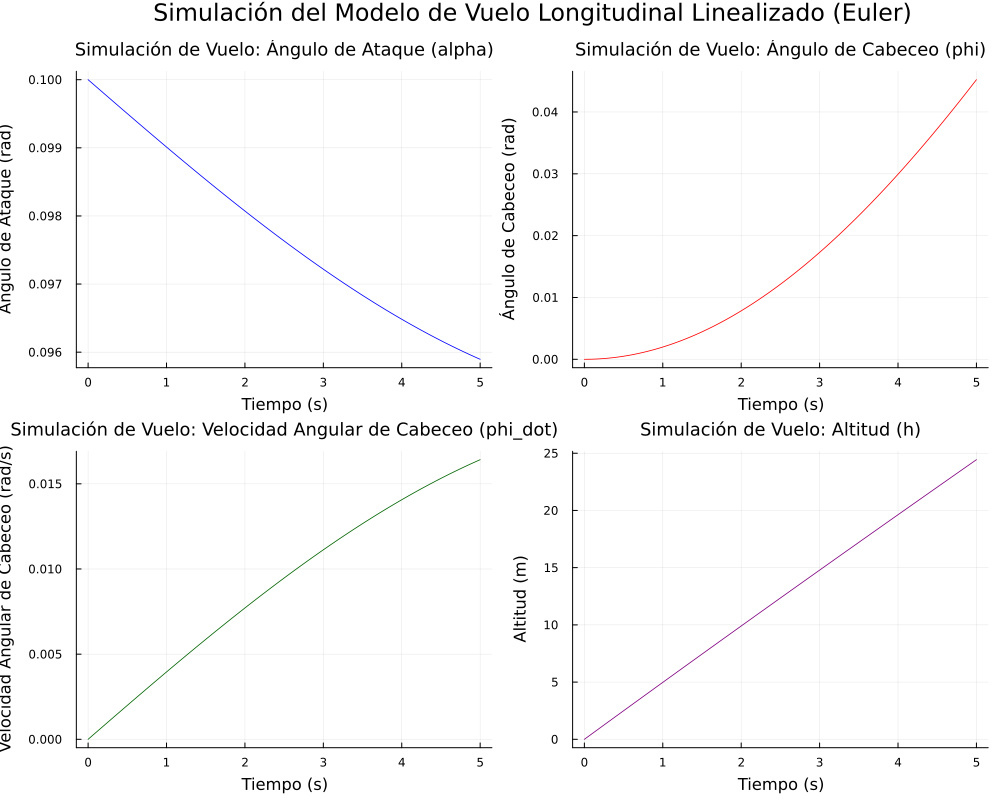

In [ ]:
# @title
using Plots
using LinearAlgebra

## Parámetros del modelo
omega = 0.2    # Frecuencia natural (rad/s)
a = 0.01       # Coeficiente de amortiguamiento
b = 2.0        # Constante de control
c_vel = 50.0   # Velocidad de vuelo (m/s)

## Parámetros de la simulación
h = 1e-3                   # Paso de tiempo (s)
t_final = 5.0              # Tiempo de simulación (s)
t_vector = 0.0:h:t_final   # Vector de tiempo (Julia range)
n_steps = length(t_vector) # Número de pasos

## Matrices del sistema lineal (A y B)
A = [ -a  a  0.0  0.0;
       0.0 0.0 1.0  0.0;
       omega^2 -omega^2 0.0 0.0;
       c_vel 0.0 0.0 0.0 ]

B = [0.0; 0.0; omega^2 * b; 0.0]

## Autovalores de la matriz A
eigenvalues_A = eigvals(A)
println("Autovalores de la matriz A:")
println(eigenvalues_A)

## Condición inicial
x0 = [0.1,    # alpha(0) - Ángulo de ataque inicial
      0.0,    # phi(0)   - Ángulo de cabeceo inicial
      0.0,    # phi_dot(0) - Velocidad angular de cabeceo inicial
      0.0]    # h(0)     - Altitud inicial

## Inicialización de la matriz de estados
x_states = zeros(Float64, 4, n_steps)
x_states[:, 1] = x0

## Entrada de control (nula para evaluar el comportamiento inherente)
u_input = zeros(Float64, 1, n_steps)

## Simulación con el método de Euler hacia adelante
for n in 1:(n_steps - 1)
    x_states[:, n + 1] = x_states[:, n] + h * (A * x_states[:, n] + B * u_input[1, n])
end

## Gráficos con Plots.jl

# Gráfico de Ángulo de ataque (alpha)
plot_alpha = plot(t_vector, x_states[1, :],
                  label=false,
                  title="Simulación de Vuelo: Ángulo de Ataque (alpha)",
                  titlefontsize=12, # <-- Nuevo: Tamaño del título
                  xlabel="Tiempo (s)",
                  ylabel="Ángulo de Ataque (rad)",
                  color=:blue,
                  linewidth=0.8,
                  grid=true)

# Gráfico de Ángulo de cabeceo (phi)
plot_phi = plot(t_vector, x_states[2, :],
                label=false,
                title="Simulación de Vuelo: Ángulo de Cabeceo (phi)",
                titlefontsize=12, # <-- Nuevo: Tamaño del título
                xlabel="Tiempo (s)",
                ylabel="Ángulo de Cabeceo (rad)",
                color=:red,
                linewidth=0.8,
                grid=true)

# Gráfico de Velocidad angular de cabeceo (phi_dot)
plot_phi_dot = plot(t_vector, x_states[3, :],
                    label=false,
                    title="Simulación de Vuelo: Velocidad Angular de Cabeceo (phi_dot)",
                    titlefontsize=12, # <-- Nuevo: Tamaño del título
                    xlabel="Tiempo (s)",
                    ylabel="Velocidad Angular de Cabeceo (rad/s)",
                    color=:darkgreen,
                    linewidth=0.8,
                    grid=true)

# Gráfico de Altitud (h)
plot_h = plot(t_vector, x_states[4, :],
              label=false,
              title="Simulación de Vuelo: Altitud (h)",
              titlefontsize=12, # <-- Nuevo: Tamaño del título
              xlabel="Tiempo (s)",
              ylabel="Altitud (m)",
              color=:purple,
              linewidth=0.8,
              grid=true)

# Combinar todos los gráficos en una sola figura
plot(plot_alpha, plot_phi, plot_phi_dot, plot_h,
     layout=(2,2),
     size=(1000, 800),
     plot_title="Simulación del Modelo de Vuelo Longitudinal Linealizado (Euler)")

2- Obtener la solución numérica del sistema lineal para evaluar cuantitativamente el
comportamiento con intención de verificar el correcto planteo. Para hacerlo, se les
asignan los valores siguientes a los parámetros, son =0,2; a=0,01; b=2; c=100
m/s, (es decir, 360Km/h), t=10-3; y el tiempo de simulación de 5 segundos.

Autovalores de la matriz A (con c_vel = 100 m/s):
ComplexF64[-0.005000000000000001 - 0.1999374902313221im, -0.005000000000000001 + 0.1999374902313221im, 0.0 + 0.0im, 0.0 + 0.0im]


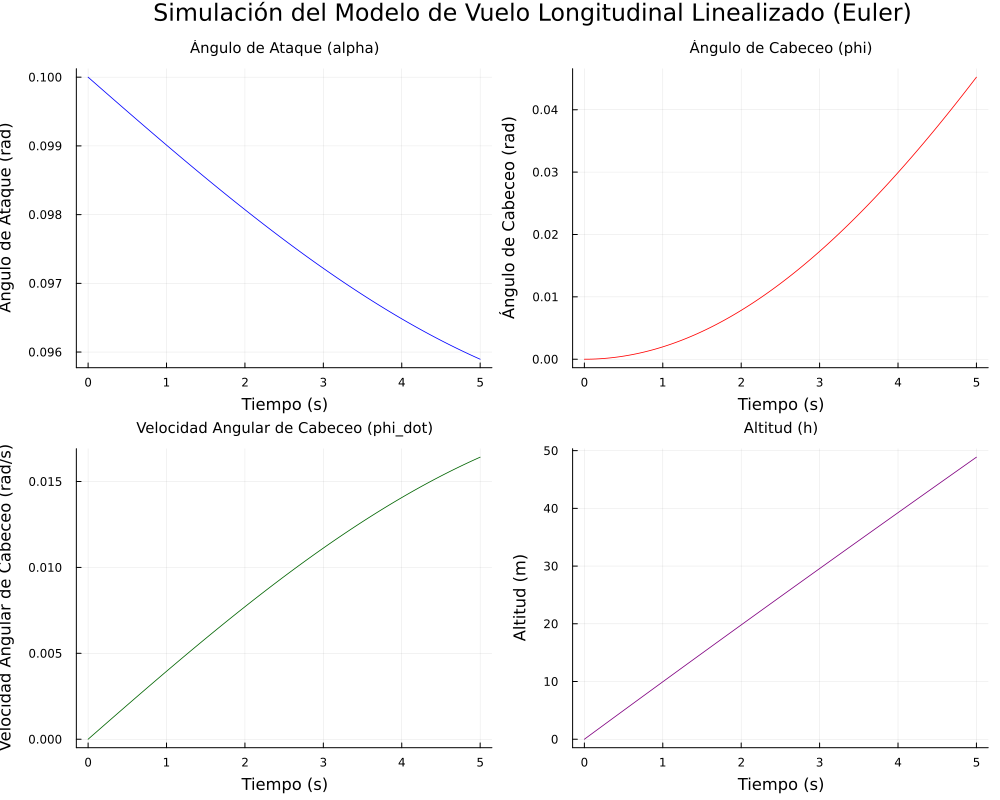

In [ ]:
# @title
using Plots          # For plotting
using LinearAlgebra  # For matrix operations (eigen, *, etc.)

## Model Parameters (Activity 2: New values for c_vel and t_final)
omega = 0.2    # Natural frequency (rad/s)
a = 0.01       # Damping coefficient
b = 2.0        # Control constant
c_vel = 100.0  # Flight velocity (m/s) (NEW VALUE: 100 m/s!)

## Simulation Parameters
h = 1e-3                   # Time step (s)
t_final = 5.0              # Simulation time (s) (NEW VALUE: 5 seconds!)
t_vector = 0.0:h:t_final   # Time vector (Julia range)
n_steps = length(t_vector) # Number of steps

## System Matrices (A and B)
# Defined row-by-row in Julia to match the effective matrix from R's column-wise fill
A = [ -a       a       0.0  0.0;
       0.0      0.0     1.0  0.0;
       omega^2 -omega^2 0.0  0.0;
       c_vel    0.0     0.0  0.0 ]

# B as a column vector
B = [0.0; 0.0; omega^2 * b; 0.0]

## Eigenvalues of matrix A
eigenvalues_A = eigvals(A) # `eigvals` from LinearAlgebra.jl
println("Autovalores de la matriz A (con c_vel = 100 m/s):")
println(eigenvalues_A)

## Initial Condition (remains the same)
x0 = [0.1,    # alpha(0) - Initial angle of attack
      0.0,    # phi(0)   - Initial pitch angle
      0.0,    # phi_dot(0) - Initial pitch angular velocity
      0.0]    # h(0)     - Initial altitude

## State Matrix Initialization
# x_states will have 4 rows (for the 4 state variables) and n_steps columns (for each time step)
x_states = zeros(Float64, 4, n_steps)
x_states[:, 1] = x0 # Assign the initial condition to the first time step

## Control Input (zero for inherent behavior)
# u_input is a 1-row by n_steps column matrix, all zeros
u_input = zeros(Float64, 1, n_steps)

## Forward Euler Simulation
# x(n+1) = x(n) + h * (A * x(n) + B * u(n))
for n in 1:(n_steps - 1)
    x_states[:, n + 1] = x_states[:, n] + h * (A * x_states[:, n] + B * u_input[1, n])
end

## Plotting with Plots.jl

# Plot of Angle of Attack (alpha)
plot_alpha = plot(t_vector, x_states[1, :],
                  label=false,
                  title="Ángulo de Ataque (alpha)",
                  titlefontsize=10,
                  xlabel="Tiempo (s)",
                  ylabel="Ángulo de Ataque (rad)",
                  color=:blue,
                  linewidth=0.8,
                  grid=true)

# Plot of Pitch Angle (phi)
plot_phi = plot(t_vector, x_states[2, :],
                label=false,
                title="Ángulo de Cabeceo (phi)",
                titlefontsize=10,
                xlabel="Tiempo (s)",
                ylabel="Ángulo de Cabeceo (rad)",
                color=:red,
                linewidth=0.8,
                grid=true)

# Plot of Pitch Angular Velocity (phi_dot)
plot_phi_dot = plot(t_vector, x_states[3, :],
                    label=false,
                    title="Velocidad Angular de Cabeceo (phi_dot)",
                    titlefontsize=10,
                    xlabel="Tiempo (s)",
                    ylabel="Velocidad Angular de Cabeceo (rad/s)",
                    color=:darkgreen,
                    linewidth=0.8,
                    grid=true)

# Plot of Altitude (h)
plot_h = plot(t_vector, x_states[4, :],
              label=false,
              title="Altitud (h)",
              titlefontsize=10,
              xlabel="Tiempo (s)",
              ylabel="Altitud (m)",
              color=:purple,
              linewidth=0.8,
              grid=true)

# Combine all plots into a single figure (2x2 layout)
plot(plot_alpha, plot_phi, plot_phi_dot, plot_h,
     layout=(2,2),
     size=(1000, 800),
     plot_title="Simulación del Modelo de Vuelo Longitudinal Linealizado (Euler)")

3- Obtener la solución numérica del sistema lineal para c=50 m/s, (es decir, 180Km/h),
Dt=10-3; y el tiempo de simulación de 20 segundos.

Autovalores de la matriz A (con c_vel = 50 m/s y t_final = 20 s):
ComplexF64[-0.005000000000000001 - 0.1999374902313221im, -0.005000000000000001 + 0.1999374902313221im, 0.0 + 0.0im, 0.0 + 0.0im]


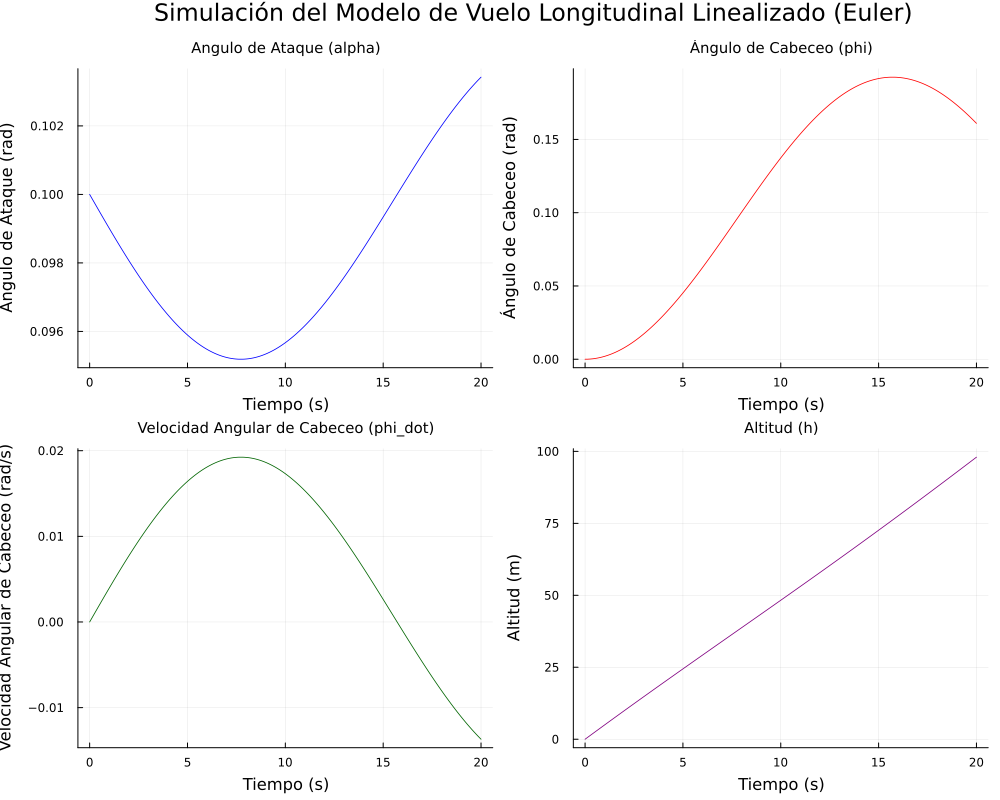

In [ ]:
# @title
using Plots          # For plotting
using LinearAlgebra  # For matrix operations (eigen, *, etc.)

## Model Parameters (Activity 3: Reverted c_vel, extended t_final)
omega = 0.2    # Natural frequency (rad/s)
a = 0.01       # Damping coefficient
b = 2.0        # Control constant
c_vel = 50.0   # Flight velocity (m/s) (REVERTED to 50 m/s!)

## Simulation Parameters
h = 1e-3                   # Time step (s)
t_final = 20.0             # Simulation time (s) (EXTENDED to 20 seconds!)
t_vector = 0.0:h:t_final   # Time vector (Julia range)
n_steps = length(t_vector) # Number of steps

## System Matrices (A and B)
# Defined row-by-row in Julia to match the effective matrix from R's column-wise fill
A = [ -a       a       0.0  0.0;
       0.0      0.0     1.0  0.0;
       omega^2 -omega^2 0.0  0.0;
       c_vel    0.0     0.0  0.0 ]

# B as a column vector
B = [0.0; 0.0; omega^2 * b; 0.0]

## Eigenvalues of matrix A
eigenvalues_A = eigvals(A) # `eigvals` from LinearAlgebra.jl
println("Autovalores de la matriz A (con c_vel = 50 m/s y t_final = 20 s):")
println(eigenvalues_A)

## Initial Condition (remains the same)
x0 = [0.1,    # alpha(0) - Initial angle of attack
      0.0,    # phi(0)   - Initial pitch angle
      0.0,    # phi_dot(0) - Initial pitch angular velocity
      0.0]    # h(0)     - Initial altitude

## State Matrix Initialization
# x_states will have 4 rows (for the 4 state variables) and n_steps columns (for each time step)
x_states = zeros(Float64, 4, n_steps)
x_states[:, 1] = x0 # Assign the initial condition to the first time step

## Control Input (zero for inherent behavior)
# u_input is a 1-row by n_steps column matrix, all zeros
u_input = zeros(Float64, 1, n_steps)

## Forward Euler Simulation
# x(n+1) = x(n) + h * (A * x(n) + B * u(n))
for n in 1:(n_steps - 1)
    x_states[:, n + 1] = x_states[:, n] + h * (A * x_states[:, n] + B * u_input[1, n])
end

## Plotting with Plots.jl (with adjusted title font sizes)

# Plot of Angle of Attack (alpha)
plot_alpha = plot(t_vector, x_states[1, :],
                  label=false,
                  title="Angulo de Ataque (alpha)",
                  titlefontsize=10,
                  xlabel="Tiempo (s)",
                  ylabel="Ángulo de Ataque (rad)",
                  color=:blue,
                  linewidth=0.8,
                  grid=true)

# Plot of Pitch Angle (phi)
plot_phi = plot(t_vector, x_states[2, :],
                label=false,
                title="Ángulo de Cabeceo (phi)",
                titlefontsize=10,
                xlabel="Tiempo (s)",
                ylabel="Ángulo de Cabeceo (rad)",
                color=:red,
                linewidth=0.8,
                grid=true)

# Plot of Pitch Angular Velocity (phi_dot)
plot_phi_dot = plot(t_vector, x_states[3, :],
                    label=false,
                    title="Velocidad Angular de Cabeceo (phi_dot)",
                    titlefontsize=10,
                    xlabel="Tiempo (s)",
                    ylabel="Velocidad Angular de Cabeceo (rad/s)",
                    color=:darkgreen,
                    linewidth=0.8,
                    grid=true)

# Plot of Altitude (h)
plot_h = plot(t_vector, x_states[4, :],
              label=false,
              title="Altitud (h)",
              titlefontsize=10,
              xlabel="Tiempo (s)",
              ylabel="Altitud (m)",
              color=:purple,
              linewidth=0.8,
              grid=true)

# Combine all plots into a single figure (2x2 layout)
plot(plot_alpha, plot_phi, plot_phi_dot, plot_h,
     layout=(2,2),
     size=(1000, 800),
     plot_title="Simulación del Modelo de Vuelo Longitudinal Linealizado (Euler)")